In [1]:
import sys
python_path = ['/home/xu.chao/cantera/build/python', '/home/xu.chao/RMG-Py', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages', '/home/xu.chao/cantera', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python37.zip', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/lib-dynload', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/chemprop-0.0.1-py3.7.egg', '/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/descriptastorus-2.0.0.32-py3.7.egg']
sys.path.clear()
for path in python_path:
    sys.path.append(path)

In [1]:
import cantera as ct
from IPython.display import Image
%matplotlib inline
from subprocess import run
from pathlib import Path

import sys
import os
sys.path.append(f'{os.getcwd()}/PyEnergyDiagram/')
sys.path.append(os.getcwd())
import pes_plot
import numpy as np
import collections
import warnings
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/cantera/__init__.py


In [2]:
yml_path = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/19.0_c-6.00o-3.25/cantera.yaml'

In [3]:
pes_plot_1 = pes_plot.pes_plot(yml_path, 800, ct.one_atm)
pes_plot_1.surf.TP=800,ct.one_atm

In [4]:
pes_plot_1.surf.species()

[<Species X(1)>,
 <Species HX(21)>,
 <Species CO2X(22)>,
 <Species COX(23)>,
 <Species CH4X(24)>,
 <Species OX(25)>,
 <Species CH2X(26)>,
 <Species CH3X(27)>,
 <Species CHX(28)>,
 <Species CX(29)>,
 <Species H2X(30)>,
 <Species OHX(31)>,
 <Species H2OX(32)>,
 <Species CHOX(33)>,
 <Species CHOX(234)>,
 <Species CH3O_X(45)>,
 <Species CH4OX(43)>,
 <Species C2H3X(244)>,
 <Species CH2O_X(46)>,
 <Species C2H6X(65)>]

In [5]:
# rxns = []
# ids = []
# for i , v in enumerate(pes_plot_1.surf.reactions()):
#     if 'CH3X(27)' in v.reactants.keys() and 'CH2X(26)' in v.products.keys():
#         print(v)
#         print(pes_plot_1.surf.forward_rate_constants[i])
#         rxns.append(pes_plot_1.surf.forward_rate_constants[i])
#         ids.append(i)
#     if 'CH3X(27)' in v.products.keys() and 'CH2X(26)' in v.reactants.keys():
#         print(v)
#         print(pes_plot_1.surf.reverse_rate_constants[i])
#         rxns.append(pes_plot_1.surf.reverse_rate_constants[i])
#         ids.append(i)
# print(pes_plot_1.surf.reaction(ids[rxns.index(max(rxns))]))
# pes_plot_1.surf.forward_rate_constants[6]
rxns = []
ids = []
for i , v in enumerate(pes_plot_1.surf.reactions()):
    if 'COX(23)' in v.reactants.keys() and 'CHX(28)' in v.products.keys():
        print(v)
        print(pes_plot_1.surf.forward_rate_constants[i])
        rxns.append(pes_plot_1.surf.forward_rate_constants[i])
        ids.append(i)
    if 'COX(23)' in v.products.keys() and 'CHX(28)' in v.reactants.keys():
        print(v)
        print(pes_plot_1.surf.reverse_rate_constants[i])
        rxns.append(pes_plot_1.surf.reverse_rate_constants[i])
        ids.append(i)
print(pes_plot_1.surf.reaction(ids[rxns.index(max(rxns))]))

COX(23) + HX(21) <=> CHX(28) + OX(25)
6317833.149013496
CHOX(33) + CHX(28) <=> CH2X(26) + COX(23)
2.0379599987375357e+17
CHOX(33) + CHX(28) <=> CH2X(26) + COX(23)


32 CH4(2) + X(1) <=> CH4X(24)
42 CH4X(24) + X(1) <=> CH3X(27) + HX(21)
7 CH2X(26) + HX(21) <=> CH3X(27) + X(1) swapped
9 CHX(28) + HX(21) <=> CH2X(26) + X(1) swapped
10 COX(23) + HX(21) <=> CHX(28) + OX(25) swapped
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(2

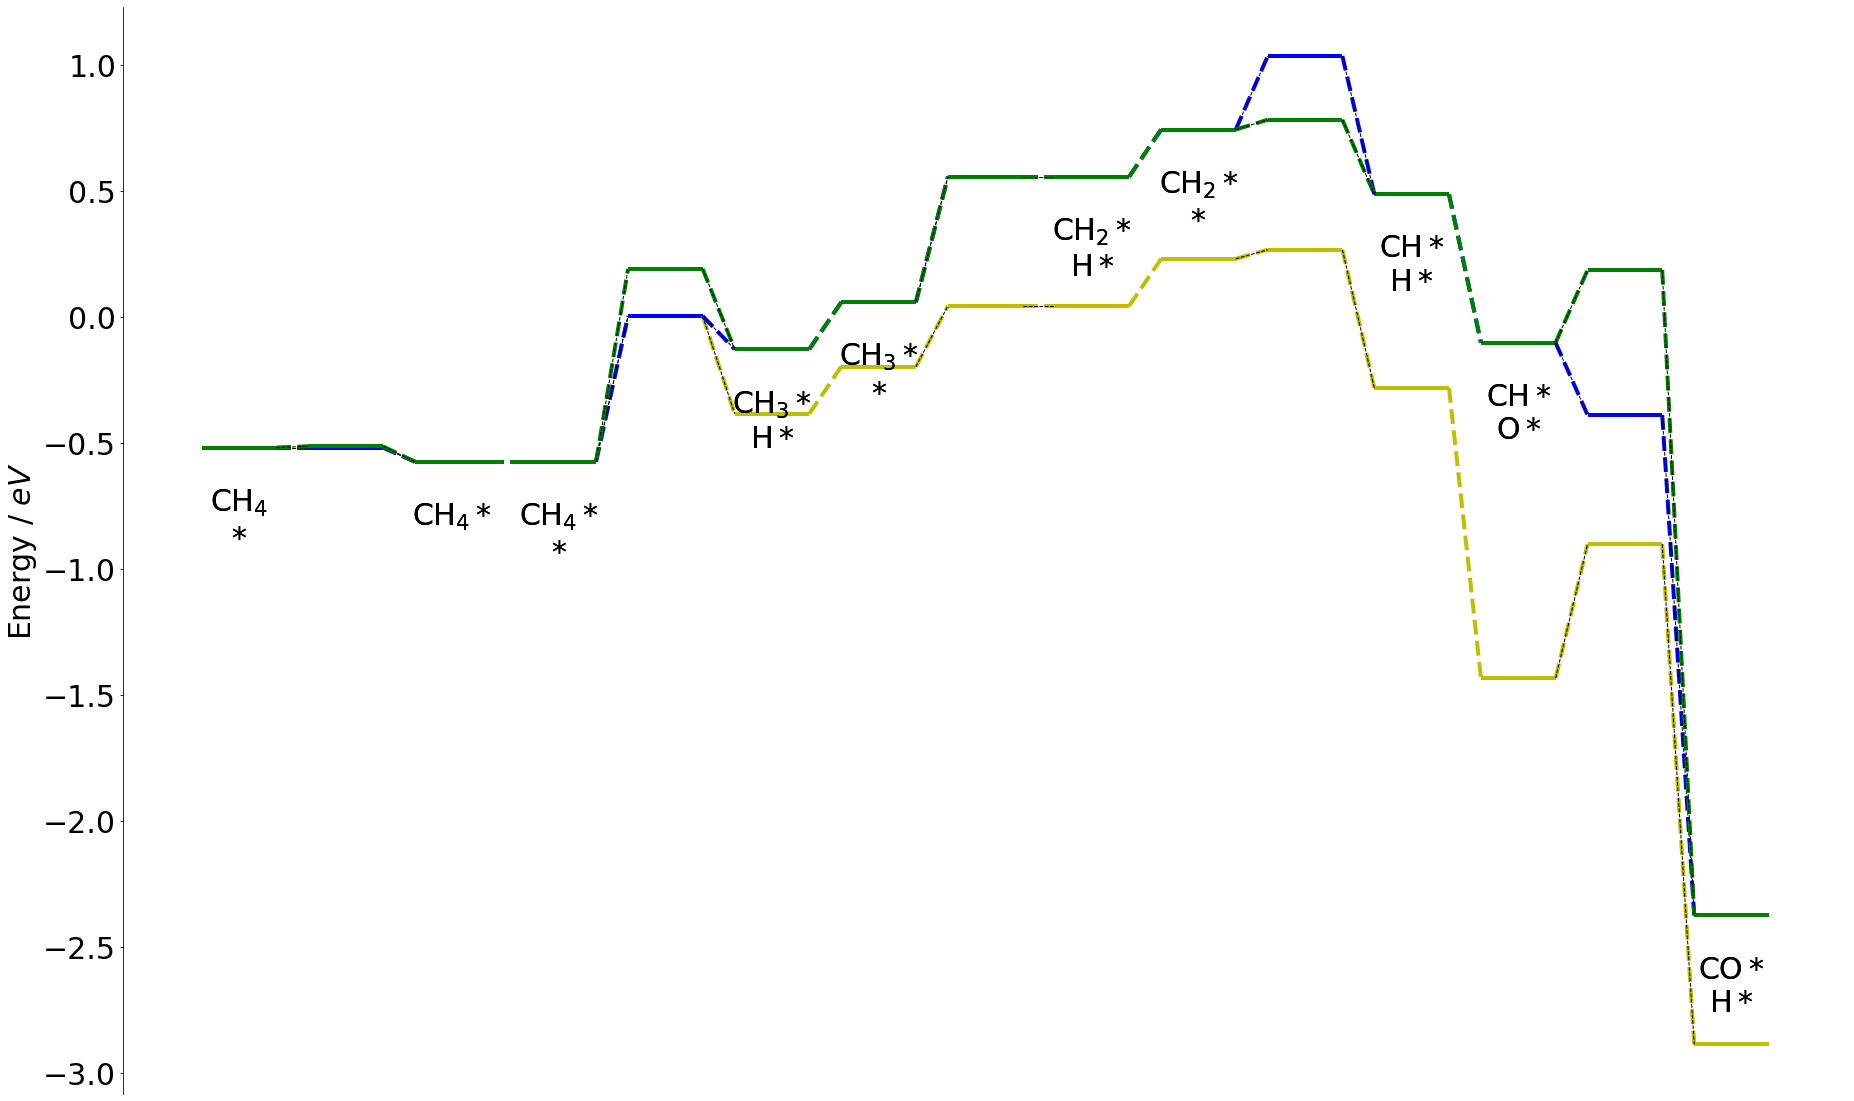

In [5]:
# sp_path = [
#            [['CH4(2)', 'X(1)'], ['CH3X(27)', 'HX(21)']],
#            [['CH3X(27)', 'OHX(31)'], ['CH2X(26)', 'H2OX(32)']],
#            [['CH2X(26)', 'OX(25)'], ['CHX(28)', 'OHX(31)']],
#            [['CHX(28)', 'OHX(31)'], ['CX(29)', 'H2OX(32)']],
#            [['CX(29)', 'OX(25)'], ['COX(23)', 'X(1)']]
#           ]
# sp_path = [
#            # [['CH4(2)', 'OHX(31)', 'X(1)'], ['CH3X(27)', 'H2OX(32)']],
#            # [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
#            [['CH4(2)', 'OX(25)', 'X(1)'], ['CH3X(27)', 'OHX(31)']],
#            [['CH3X(27)', 'OHX(31)'], ['CH2X(26)', 'H2OX(32)']],
#            [['CH2X(26)', 'OX(25)'], ['CHX(28)', 'OHX(31)']],
#            [['CHX(28)', 'OHX(31)'], ['CX(29)', 'H2OX(32)']],
#            [['CX(29)', 'OX(25)'], ['COX(23)', 'X(1)']]
#           ]
sp_path = [
           # [['CH4(2)', 'OHX(31)', 'X(1)'], ['CH3X(27)', 'H2OX(32)']],
           # [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           # [['O2(3)', 'X(1)', 'X(1)'], ['OX(25)', 'OX(25)']],
           [['CH4(2)', 'X(1)'], ['CH4X(24)']],
           [['CH4X(24)', 'X(1)'], ['CH3X(27)', 'HX(21)']],
           [['CH3X(27)', 'X(1)'], ['CH2X(26)', 'HX(21)']],
           [['CH2X(26)', 'X(1)'], ['CHX(28)', 'HX(21)']],
           [['CHX(28)', 'OX(25)'], ['COX(23)', 'HX(21)']],
          ]


def search_rxn(reactants, products, rxn_list):
    for i, rxn in enumerate(rxn_list):
        count = collections.Counter
        if count(reactants) == count(rxn.reactants) and count(products) == count(rxn.products):
            print(i, rxn)
            return i, False
        elif count(reactants) == count(rxn.products) and count(products) == count(rxn.reactants):
            print(i, rxn, 'swapped')
            return i, True
    raise ValueError('not found!')

rxn_path = []
for combo in sp_path:
    rxn_idx, swapped = search_rxn(combo[0], combo[1], pes_plot_1.surf.reactions())
    if type(rxn_idx) == int:
        rxn_path.append((rxn_idx, swapped))
rxn_path

yml_orig = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/19.0_c-6.00o-3.25/cantera.yaml'
yml_bm = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_bm/binding_energies/19.0_c-6.00o-3.25/cantera.yaml'
plt.rcParams.update({'font.size': 30})
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
yml_pt = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/base_modified_pt.yaml'
models = []
for f_path in [yml_pt,yml_orig, yml_bm]:
    gas = ct.Solution(f_path, 'gas')
    surf = ct.Interface(f_path, 'surface1', [gas])
    surf.TP= 800, ct.one_atm
    gas.TP = 800, ct.one_atm
    models.append([gas, surf])
pes_plot.plot_multi_mech(
    models, 
    rxn_path,
    width=40, 
    height=20,
    offset=None,
    dimension=None,
    space=None,
    level_linewidth=4,
    link_linewidth=4
    )
plt.savefig('energy_diagram_CMPO_BMA.png', bbox_inches='tight')

32 CH4(2) + X(1) <=> CH4X(24)
56 CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
39 CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) swapped
{'CH4X(24)': -0.575}
{'CH4X(24)': -0.575}
{'CH4X(24)': -0.575}
{'CH3X(27) OHX(31)': -1.613}
{'CH3X(27) OHX(31)': -1.076}
{'CH3X(27) OHX(31)': -1.076}
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
{'

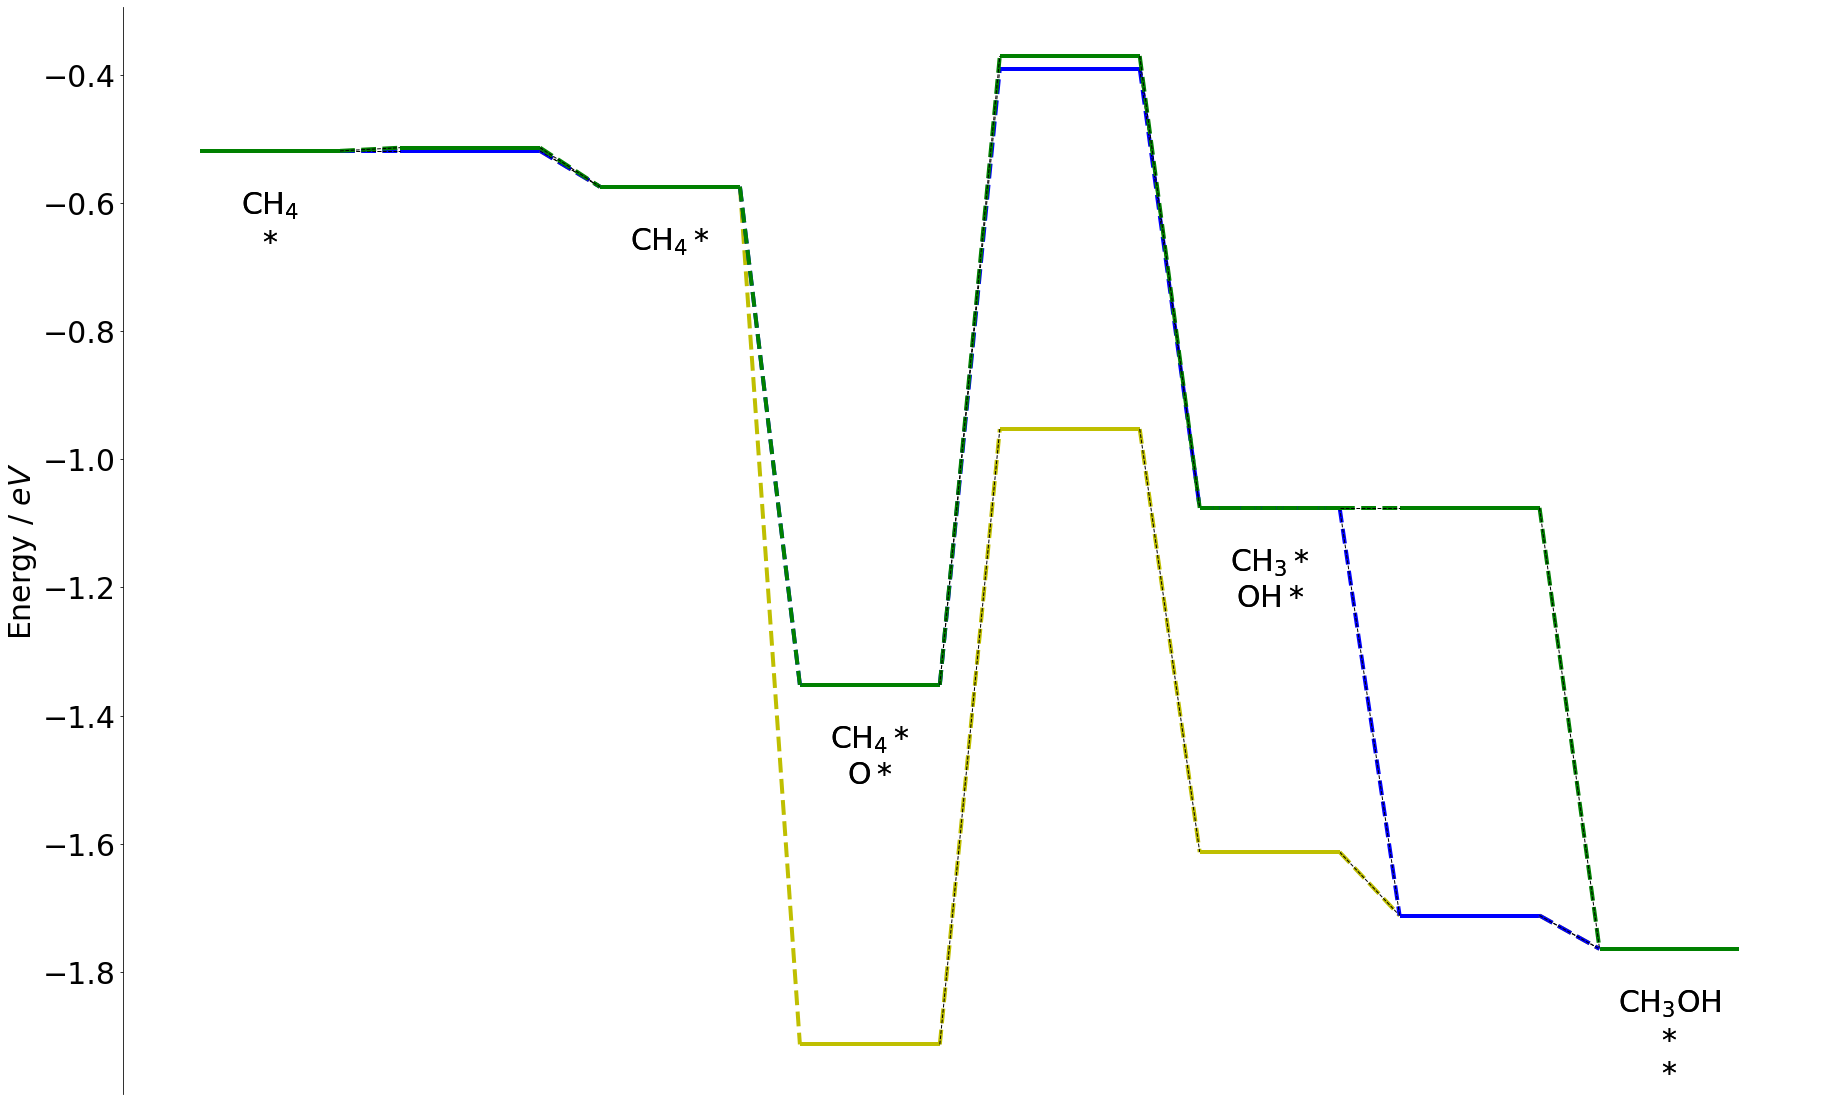

In [5]:
# sp_path = [
#            [['CH4(2)', 'X(1)'], ['CH3X(27)', 'HX(21)']],
#            [['CH3X(27)', 'OHX(31)'], ['CH2X(26)', 'H2OX(32)']],
#            [['CH2X(26)', 'OX(25)'], ['CHX(28)', 'OHX(31)']],
#            [['CHX(28)', 'OHX(31)'], ['CX(29)', 'H2OX(32)']],
#            [['CX(29)', 'OX(25)'], ['COX(23)', 'X(1)']]
#           ]
# sp_path = [
#            # [['CH4(2)', 'OHX(31)', 'X(1)'], ['CH3X(27)', 'H2OX(32)']],
#            # [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
#            [['CH4(2)', 'OX(25)', 'X(1)'], ['CH3X(27)', 'OHX(31)']],
#            [['CH3X(27)', 'OHX(31)'], ['CH2X(26)', 'H2OX(32)']],
#            [['CH2X(26)', 'OX(25)'], ['CHX(28)', 'OHX(31)']],
#            [['CHX(28)', 'OHX(31)'], ['CX(29)', 'H2OX(32)']],
#            [['CX(29)', 'OX(25)'], ['COX(23)', 'X(1)']]
#           ]
sp_path = [
           # [['CH4(2)', 'OHX(31)', 'X(1)'], ['CH3X(27)', 'H2OX(32)']],
           # [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           # [['O2(3)', 'X(1)', 'X(1)'], ['OX(25)', 'OX(25)']],
           [['CH4(2)', 'X(1)'], ['CH4X(24)']],
           [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           [['CH3X(27)', 'OHX(31)'], ['CH3OH(14)', 'X(1)', 'X(1)']],
          ]


def search_rxn(reactants, products, rxn_list):
    for i, rxn in enumerate(rxn_list):
        count = collections.Counter
        if count(reactants) == count(rxn.reactants) and count(products) == count(rxn.products):
            print(i, rxn)
            return i, False
        elif count(reactants) == count(rxn.products) and count(products) == count(rxn.reactants):
            print(i, rxn, 'swapped')
            return i, True
    raise ValueError('not found!')

rxn_path = []
for combo in sp_path:
    rxn_idx, swapped = search_rxn(combo[0], combo[1], pes_plot_1.surf.reactions())
    if type(rxn_idx) == int:
        rxn_path.append((rxn_idx, swapped))
rxn_path

yml_orig = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/19.0_c-6.00o-3.25/cantera.yaml'
yml_bm = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_bm/binding_energies/19.0_c-6.00o-3.25/cantera.yaml'
plt.rcParams.update({'font.size': 30})
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
yml_pt = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/base_modified_pt.yaml'
models = []
for f_path in [yml_pt,yml_orig, yml_bm]:
    gas = ct.Solution(f_path, 'gas')
    surf = ct.Interface(f_path, 'surface1', [gas])
    surf.TP= 800, ct.one_atm
    gas.TP = 800, ct.one_atm
    models.append([gas, surf])
pes_plot.plot_multi_mech(
    models, 
    rxn_path,
    width=40, 
    height=20,
    offset=None,
    dimension=None,
    space=None,
    level_linewidth=4,
    link_linewidth=4
    )
plt.savefig('energy_diagram_CMPO.png', bbox_inches='tight')